In [35]:
import awkward as ak
import uproot
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import LogNorm
mpl.rcParams['figure.dpi'] = 200

import seaborn as sns
from scipy import stats

from coffea.nanoevents import NanoEventsFactory, BaseSchema

In [6]:
files = '/ecoderemdvol/EleGun/EPGun-PU200/data/hgcal_ntuples/0000/'

In [8]:
gen_pt=[]
gen_eta=[]

In [22]:
for i in [1,3,4,5,6,7,8,10]:
    file_dir = '/ecoderemdvol/EleGun/EPGun-PU200/data/hgcal_ntuples/0000/ntuple_{}.root'.format(i)
    
    print(file_dir)

    signalfile = uproot.open(file_dir)
    
    events = NanoEventsFactory.from_root(
    signalfile,
    treepath='FloatingpointThreshold0DummyHistomaxGenmatchGenclustersntuple/HGCalTriggerNtuple',
    #entry_stop=10,
    #metadata={"dataset": "llp"},
    schemaclass=BaseSchema,
    ).events()
    
    gen_pt_i = events.gen_pt[:,0]
    gen_eta_i = events.gen_eta[:,0]
    
    gen_pt = np.append(gen_pt,gen_pt_i)
    gen_eta = np.append(gen_eta,gen_eta_i)
    
    
"""
for file in os.listdir(files):
    file_dir = os.path.join(files,file)
"""

/ecoderemdvol/EleGun/EPGun-PU200/data/hgcal_ntuples/0000/ntuple_1.root
/ecoderemdvol/EleGun/EPGun-PU200/data/hgcal_ntuples/0000/ntuple_3.root
/ecoderemdvol/EleGun/EPGun-PU200/data/hgcal_ntuples/0000/ntuple_4.root
/ecoderemdvol/EleGun/EPGun-PU200/data/hgcal_ntuples/0000/ntuple_5.root
/ecoderemdvol/EleGun/EPGun-PU200/data/hgcal_ntuples/0000/ntuple_6.root
/ecoderemdvol/EleGun/EPGun-PU200/data/hgcal_ntuples/0000/ntuple_7.root
/ecoderemdvol/EleGun/EPGun-PU200/data/hgcal_ntuples/0000/ntuple_8.root
/ecoderemdvol/EleGun/EPGun-PU200/data/hgcal_ntuples/0000/ntuple_10.root


'\nfor file in os.listdir(files):\n    file_dir = os.path.join(files,file)\n'

In [23]:
np.count_nonzero(gen_pt < 35), np.count_nonzero(gen_pt >=35)

(15023, 74870)

<function matplotlib.pyplot.savefig(*args, **kwargs)>

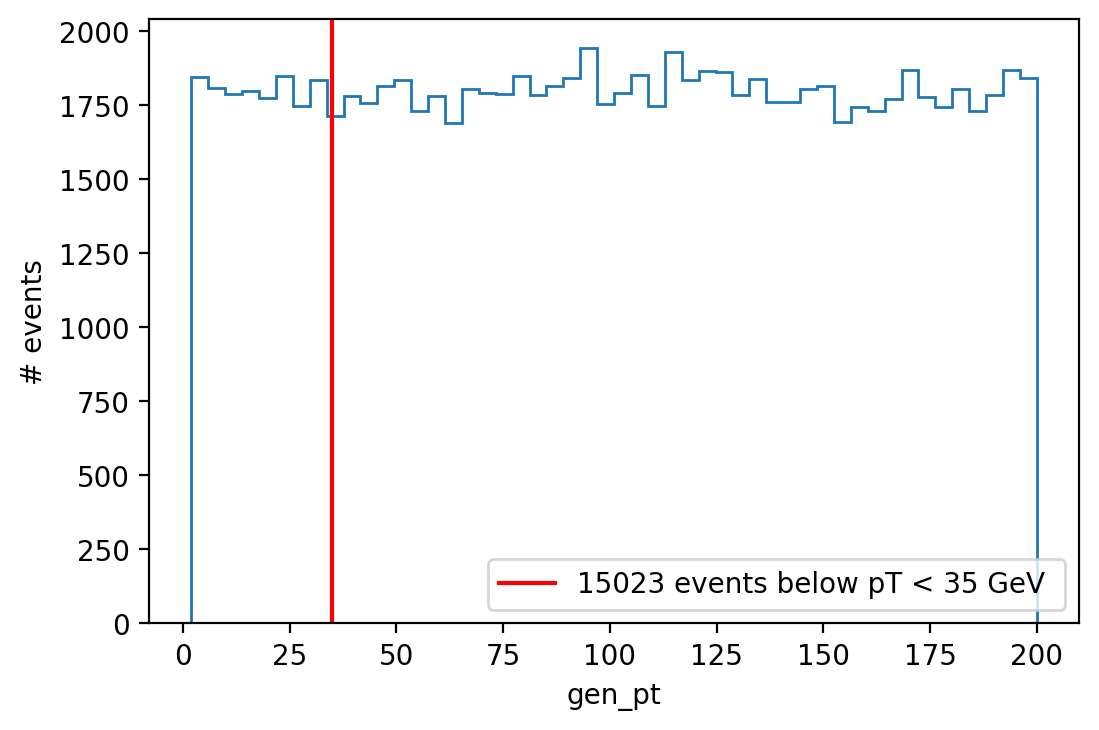

In [36]:
plt.hist(gen_pt,50,histtype='step');
plt.xlabel('gen_pt')
plt.ylabel('# events')
plt.axvline(x = 35,color = 'red',label = '{} events below pT < 35 GeV '.format(np.count_nonzero(gen_pt < 35)))
plt.legend(loc='lower right')
plt.savefig

Text(0, 0.5, '# events')

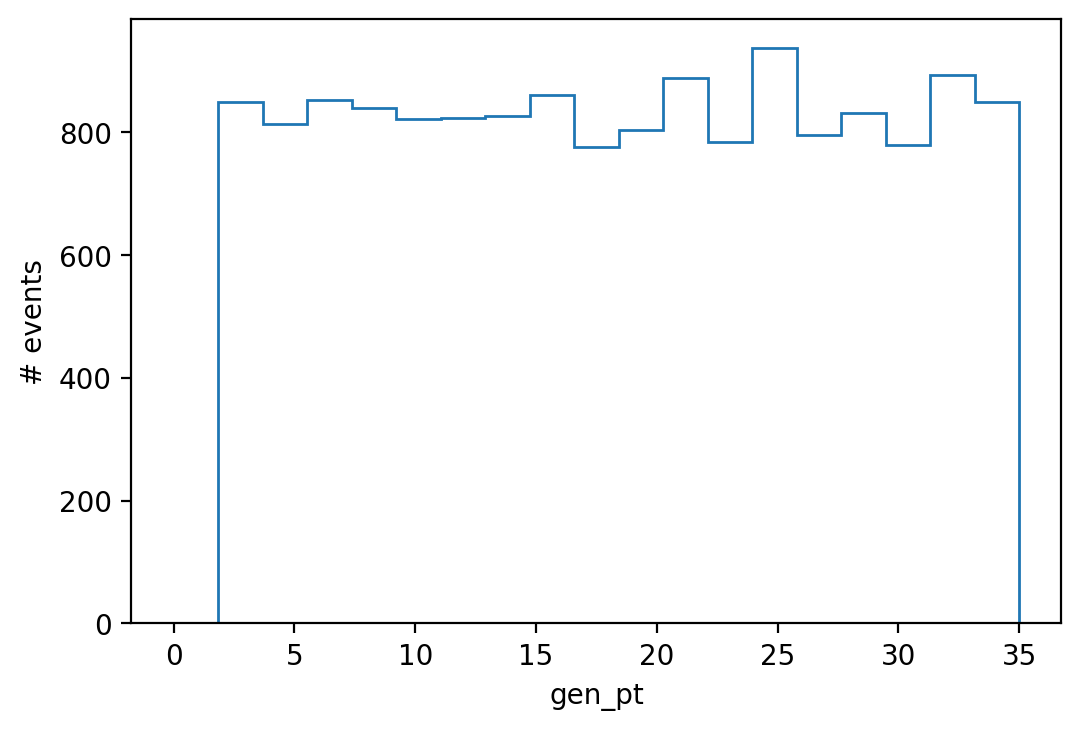

In [37]:
plt.hist(gen_pt,bins=np.linspace(0,35,20),histtype='step');
plt.xlabel('gen_pt')
plt.ylabel('# events')

Text(0, 0.5, '# events')

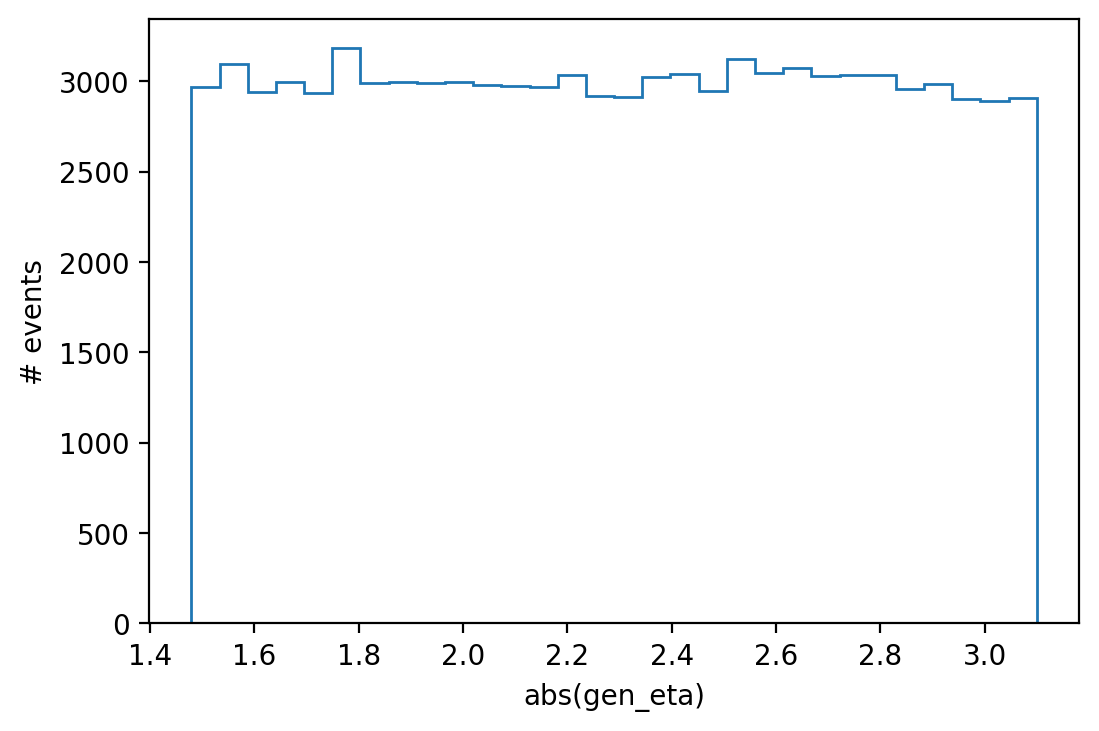

In [38]:
plt.hist(abs(gen_eta),30,histtype='step');
plt.xlabel('abs(gen_eta)')
plt.ylabel('# events')

read low pT trigger cell data for layers 5,7,9 and 11


In [40]:
tc_data = pd.read_csv('/ecoderemdvol/features/nElinks_5/1.csv')

In [43]:
for i in [3,4,5,6,7,8,10]:
    file_dir = '/ecoderemdvol/features/nElinks_5/{}.csv'.format(i)
    
    print(file_dir)
    
    df_i = pd.read_csv(file_dir)
    
    tc_data=pd.concat([tc_data,df_i])

/ecoderemdvol/features/nElinks_5/3.csv
/ecoderemdvol/features/nElinks_5/4.csv
/ecoderemdvol/features/nElinks_5/5.csv
/ecoderemdvol/features/nElinks_5/6.csv
/ecoderemdvol/features/nElinks_5/7.csv
/ecoderemdvol/features/nElinks_5/8.csv
/ecoderemdvol/features/nElinks_5/10.csv


In [45]:
tc_data.to_csv('/ecoderemdvol/features/layers5_11.csv')

In [46]:
layer_9 = tc_data[tc_data.layer==9]

In [63]:
layer_9.to_csv('/ecoderemdvol/features/layer_9.csv')

In [62]:
len(tc_data['tc_eta']),len(layer_9['tc_eta'])

(4963321, 1271614)

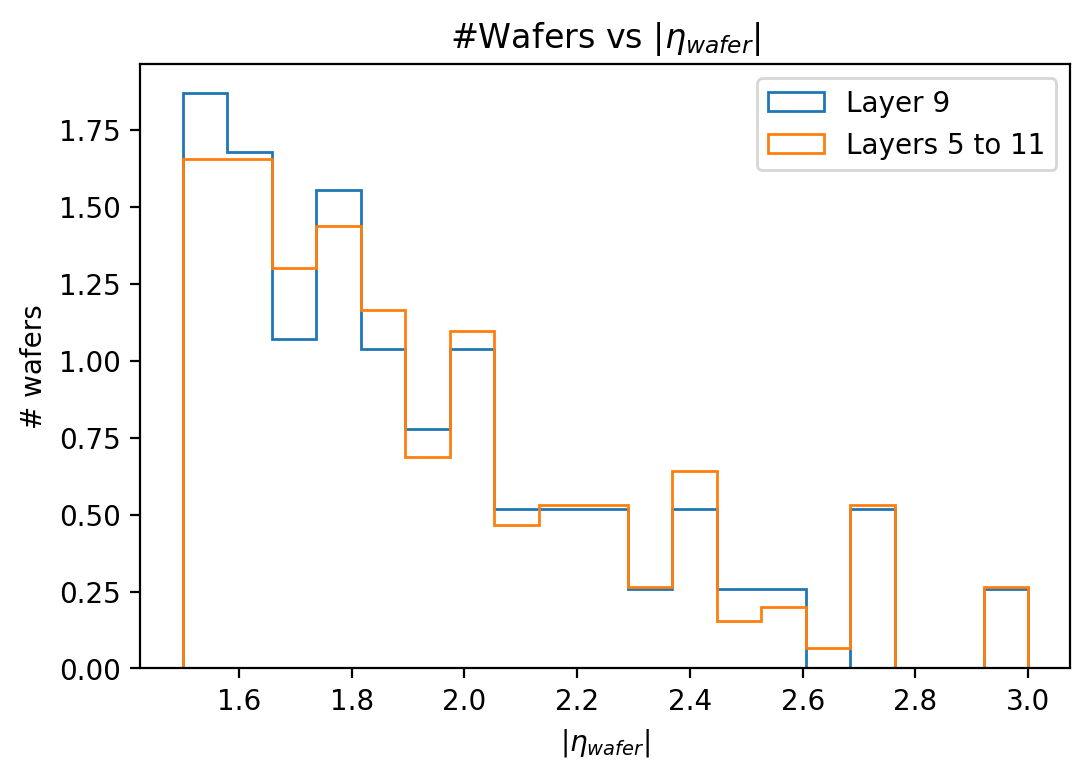

In [48]:
plt.close()
plt.hist(layer_9['tc_eta'],bins = np.linspace(1.5,3,20),label = 'Layer 9',histtype='step',density=True)
plt.hist(tc_data['tc_eta'],bins = np.linspace(1.5,3,20),label = 'Layers 5 to 11',histtype='step',density=True)
plt.ylabel('# wafers')
plt.xlabel(r'|$\eta_{wafer}$|')
plt.legend()
plt.title(r'#Wafers vs |$\eta_{wafer}$|');

In [49]:
layers_5_11=tc_data

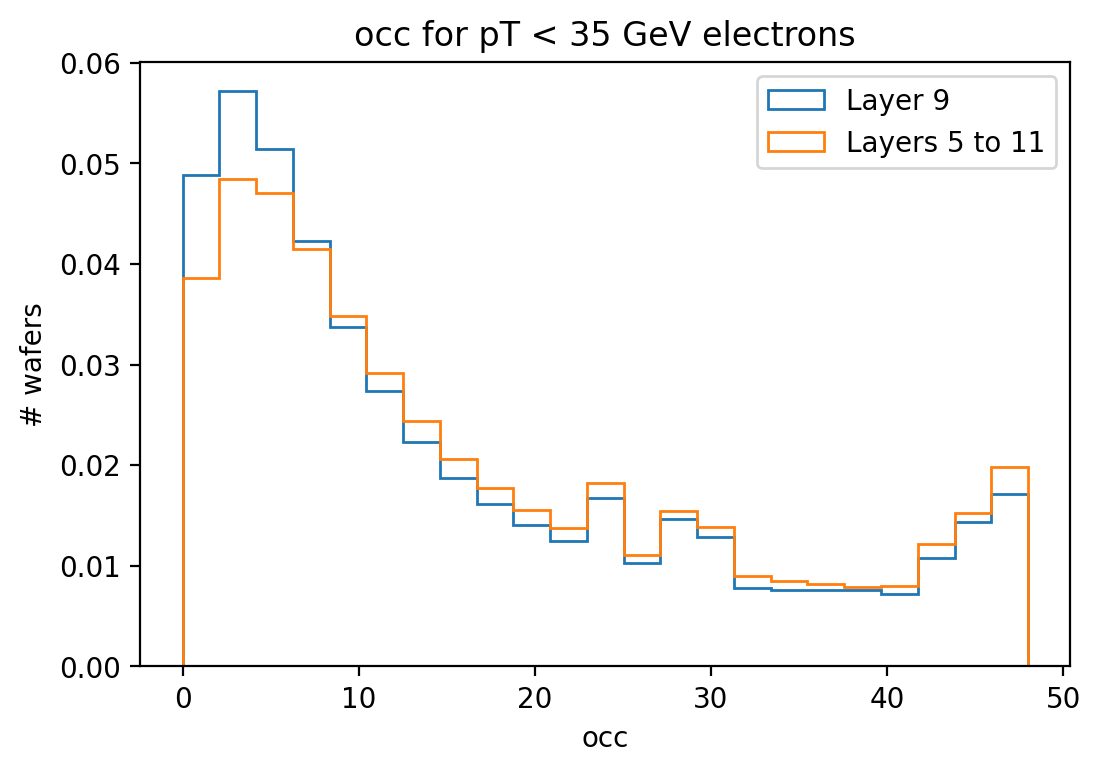

In [51]:
CALQ_COLS = ['CALQ_%i'%c for c in range(0, 48)]
layer_9_calQ = layer_9[CALQ_COLS]
layers_5_11_calQ = layers_5_11[CALQ_COLS]

layer_9_occ = np.count_nonzero(layer_9_calQ,axis=1)
layers_5_11_occ = np.count_nonzero(layers_5_11_calQ,axis=1)

plt.hist(layer_9_occ, bins = np.linspace(0,48,24),label = 'Layer 9',histtype='step',density = True)
plt.hist(layers_5_11_occ, bins = np.linspace(0,48,24),label = 'Layers 5 to 11',histtype='step',density = True)
plt.xlabel('occ')
plt.ylabel('# wafers')
plt.legend(loc='upper right')
plt.title('occ for pT < 35 GeV electrons');

### Sim energy > 0 cut, only electron wafers

In [52]:
sim_9 = layer_9[layer_9.simenergy>0]
sim_5_11 = layers_5_11[layers_5_11.simenergy>0]

In [65]:
len(sim_9['tc_eta']),len(sim_5_11['tc_eta'])

(20343, 79313)

In [66]:
sim_9.to_csv('/ecoderemdvol/features/test_layers/sim_cuts/layer_9/nElinks_5/data.csv')

In [67]:
sim_5_11.to_csv('/ecoderemdvol/features/test_layers/sim_cuts/layer_11/nElinks_5/data.csv')

In [69]:
20343/5, 4068*5

(4068.6, 20340)

In [71]:
79313/5,15862*5

(15862.6, 79310)

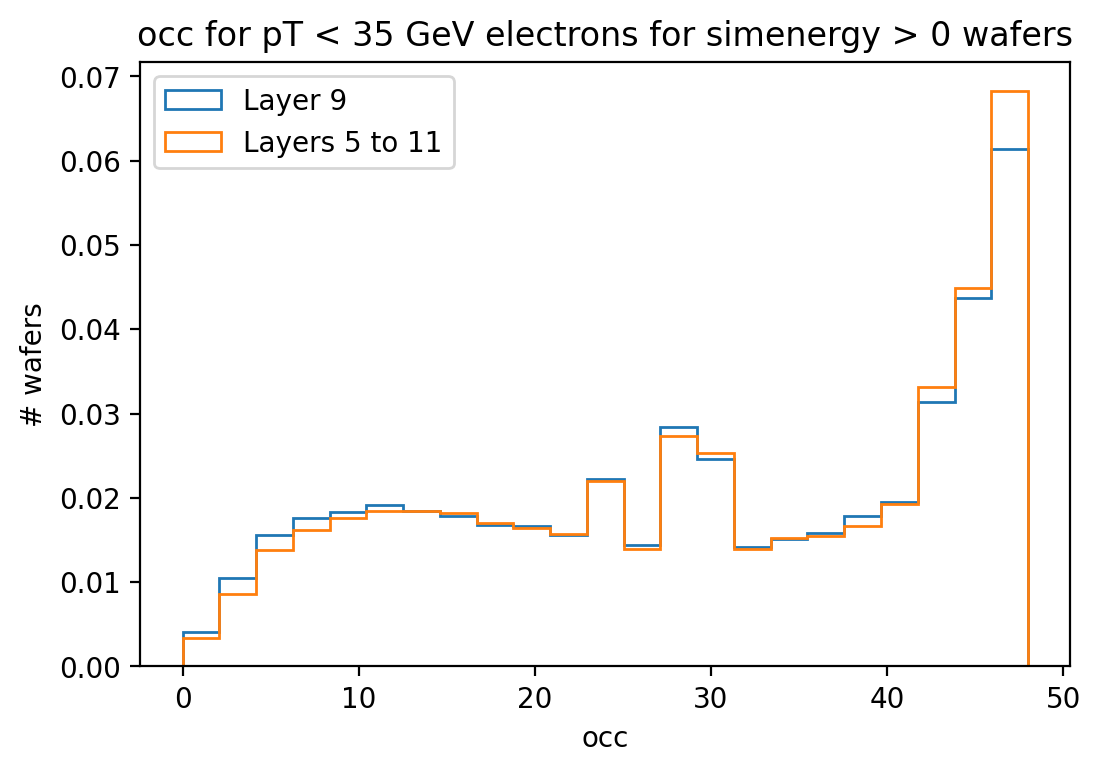

In [55]:
CALQ_COLS = ['CALQ_%i'%c for c in range(0, 48)]
sim_9_calQ = sim_9[CALQ_COLS]
sim_5_11_calQ = sim_5_11[CALQ_COLS]

sim_9_occ = np.count_nonzero(sim_9_calQ,axis=1)
sim_5_11_occ = np.count_nonzero(sim_5_11_calQ,axis=1)

plt.hist(sim_9_occ, bins = np.linspace(0,48,24),label = 'Layer 9',histtype='step',density = True)
plt.hist(sim_5_11_occ, bins = np.linspace(0,48,24),label = 'Layers 5 to 11',histtype='step', density = True)
plt.xlabel('occ')
plt.ylabel('# wafers')
plt.legend(loc='upper left')
plt.title('occ for pT < 35 GeV electrons for simenergy > 0 wafers');

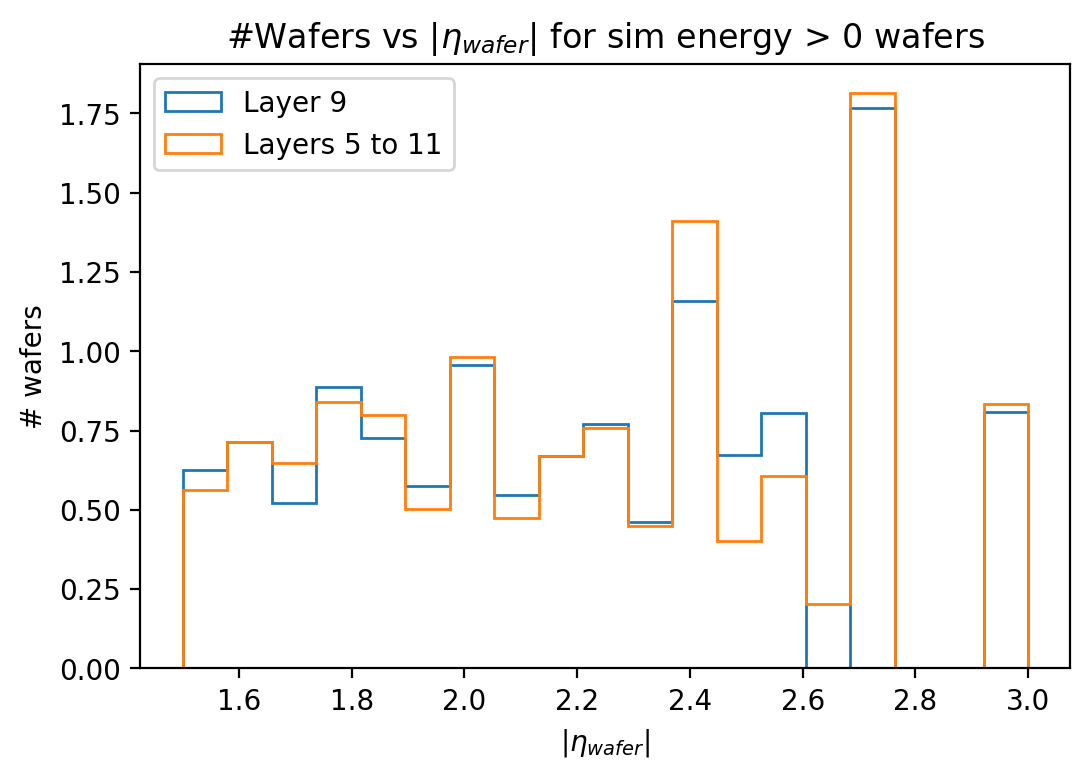

In [58]:
plt.close()
plt.hist(sim_9['tc_eta'],bins = np.linspace(1.5,3,20),label = 'Layer 9',histtype='step',density = True)
plt.hist(sim_5_11['tc_eta'],bins = np.linspace(1.5,3,20),label = 'Layers 5 to 11',histtype='step',density = True)
plt.ylabel('# wafers')
plt.xlabel(r'|$\eta_{wafer}$|')
plt.legend(loc='upper left')
plt.title(r'#Wafers vs |$\eta_{wafer}$| for sim energy > 0 wafers');

In [59]:
layer_9['tc_sum'] = layer_9_calQ.sum(axis=1)
layers_5_11['tc_sum'] = layers_5_11_calQ.sum(axis=1)

/tmp/ipykernel_89/3928099672.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  layer_9['tc_sum'] = layer_9_calQ.sum(axis=1)


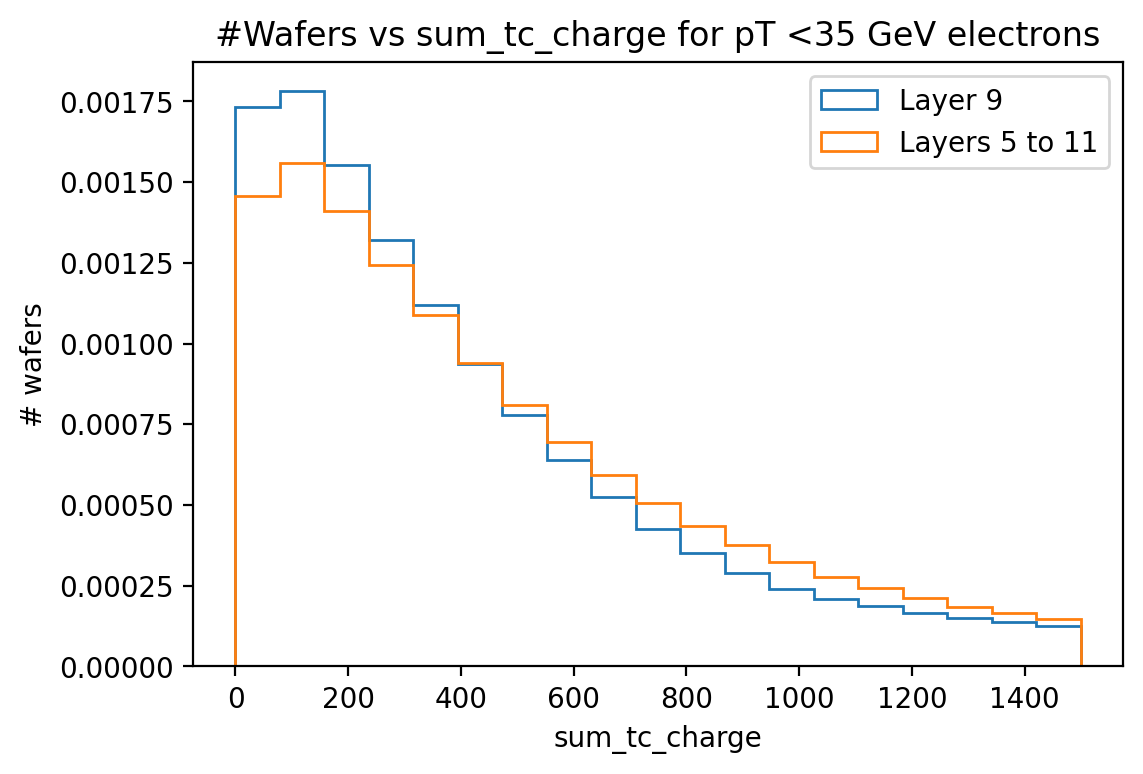

In [61]:
plt.close()
plt.hist(layer_9['tc_sum'],bins = np.linspace(0,1500,20),label = 'Layer 9',histtype='step',density = True)
plt.hist(layers_5_11['tc_sum'],bins = np.linspace(0,1500,20),label = 'Layers 5 to 11',histtype='step', density = True)
plt.ylabel('# wafers')
plt.xlabel(r'sum_tc_charge')
plt.legend()
plt.title(r'#Wafers vs sum_tc_charge for pT <35 GeV electrons');

In [2]:
low_pt_data  = pd.read_csv('/ecoderemdvol/features/low_pt.csv',usecols = ['simenergy'])

In [3]:
high_pt_data = pd.read_csv('/ecoderemdvol/features/high_pt.csv',usecols = ['simenergy'])

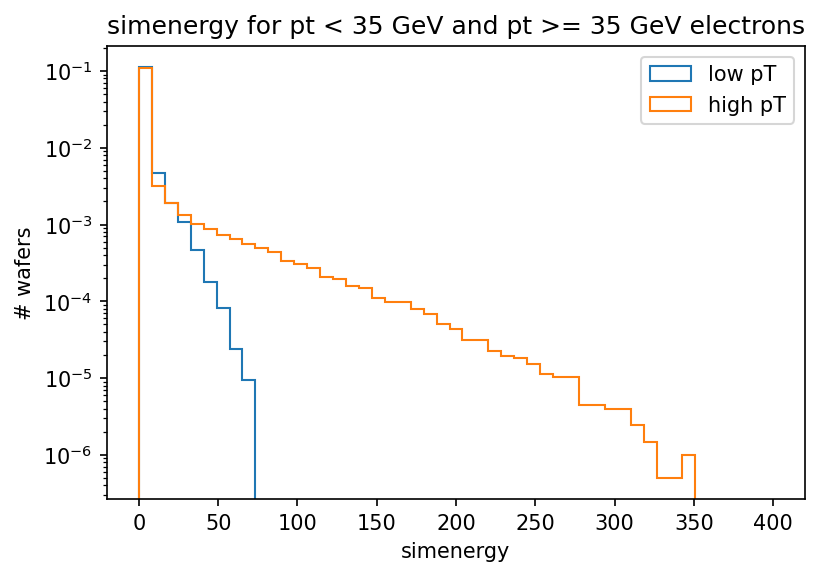

In [24]:
plt.close()
plt.hist(low_pt_data['simenergy'][low_pt_data.simenergy>0],bins = np.linspace(0,400,50),label = 'low pT',histtype='step', density = True)
plt.hist(high_pt_data['simenergy'][high_pt_data.simenergy>0],bins = np.linspace(0,400,50),label = 'high pT',histtype='step', density = True)
plt.yscale('log')
plt.ylabel('# wafers')
plt.xlabel('simenergy')
plt.legend()
plt.title('simenergy for pt < 35 GeV and pt >= 35 GeV electrons');

Now plotting only for pT < 35 GeV electrons

In [8]:
low_pt_data  = pd.read_csv('/ecoderemdvol/features/low_pt.csv')

In [9]:
sim = np.sort(low_pt_data['simenergy'][low_pt_data.simenergy>0])

In [10]:
np.min(sim), np.mean(sim), np.max(sim)

(2.127252e-07, 1.8875492270795713, 72.335266)

In [11]:
w_sim = low_pt_data[low_pt_data.simenergy>0]

In [12]:
len(w_sim['simenergy'])/len(low_pt_data['simenergy'])

0.008032215063596828

/tmp/ipykernel_79/3963193154.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  med = w_sim[w_sim.simenergy >= low_max][w_sim.simenergy < med_max]


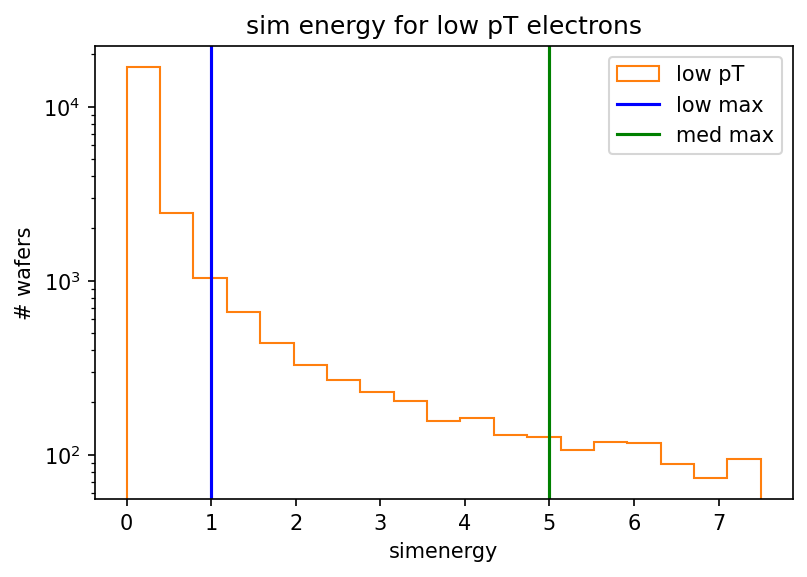

In [25]:
#choose thresholds arbitrarily and normalize histograms later

low_max, med_max= 1,5

low = w_sim[w_sim.simenergy < low_max]
med = w_sim[w_sim.simenergy >= low_max][w_sim.simenergy < med_max]
high = w_sim[w_sim.simenergy >= med_max]

plt.close()
plt.hist(low_pt_data['simenergy'][low_pt_data.simenergy>0],bins = np.linspace(0,7.5,20),label = 'low pT',color = 'tab:orange',histtype='step')
plt.yscale('log')
plt.ylabel('# wafers')
plt.xlabel('simenergy')
plt.axvline(x = low_max,color = 'blue',label = 'low max')
plt.axvline(x = med_max,color = 'green',label = 'med max')
plt.legend()
plt.title('sim energy for low pT electrons');

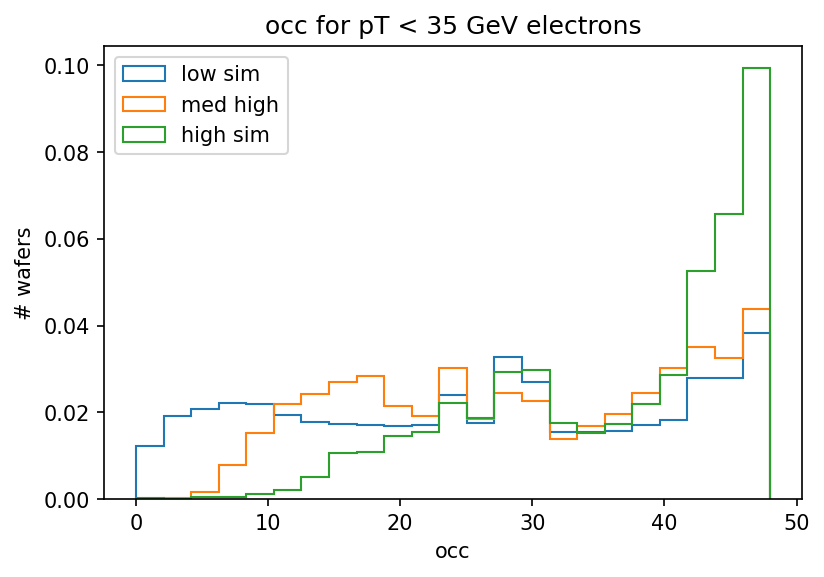

In [26]:
CALQ_COLS = ['CALQ_%i'%c for c in range(0, 48)]
low_calQ = low[CALQ_COLS]
med_calQ = med[CALQ_COLS]
high_calQ = high[CALQ_COLS]

low_occ = np.count_nonzero(low_calQ,axis=1)
med_occ = np.count_nonzero(med_calQ,axis=1)
high_occ = np.count_nonzero(high_calQ,axis=1)

#Normalize histograms

plt.hist(low_occ, bins = np.linspace(0,48,24),label = 'low sim',histtype='step',density = True)
plt.hist(med_occ, bins = np.linspace(0,48,24),label = 'med high',histtype='step',density = True)
plt.hist(high_occ, bins = np.linspace(0,48,24),label = 'high sim',histtype='step',density = True)
plt.xlabel('occ')
plt.ylabel('# wafers')
plt.legend(loc='upper left')
plt.title('occ for pT < 35 GeV electrons');

In [15]:
low['occ'] = low_occ;
med['occ'] = med_occ;
high['occ'] = high_occ;

/tmp/ipykernel_79/1914247685.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low['occ'] = low_occ;
/tmp/ipykernel_79/1914247685.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high['occ'] = high_occ;


In [16]:
eta_bin_edges = np.linspace(1.5,3.1,9)
layer_bin_edges =np.linspace(0,35,8)

In [17]:
low_mean,x_bins,y_bins,c = stats.binned_statistic_2d(x = low['tc_eta'],
                                                       y = low['layer'],
                                                       values = low['occ'],
                                                       statistic = 'mean',
                                                       bins=[eta_bin_edges,layer_bin_edges])
med_mean,x_bins,y_bins,c = stats.binned_statistic_2d(x = med['tc_eta'],
                                                       y = med['layer'],
                                                       values = med['occ'],
                                                       statistic = 'mean',
                                                       bins=[eta_bin_edges,layer_bin_edges])
high_mean,x_bins,y_bins,c = stats.binned_statistic_2d(x = high['tc_eta'],
                                                       y = high['layer'],
                                                       values = high['occ'],
                                                       statistic = 'mean',
                                                       bins=[eta_bin_edges,layer_bin_edges])

In [ ]:
plt.hist(low_mean)

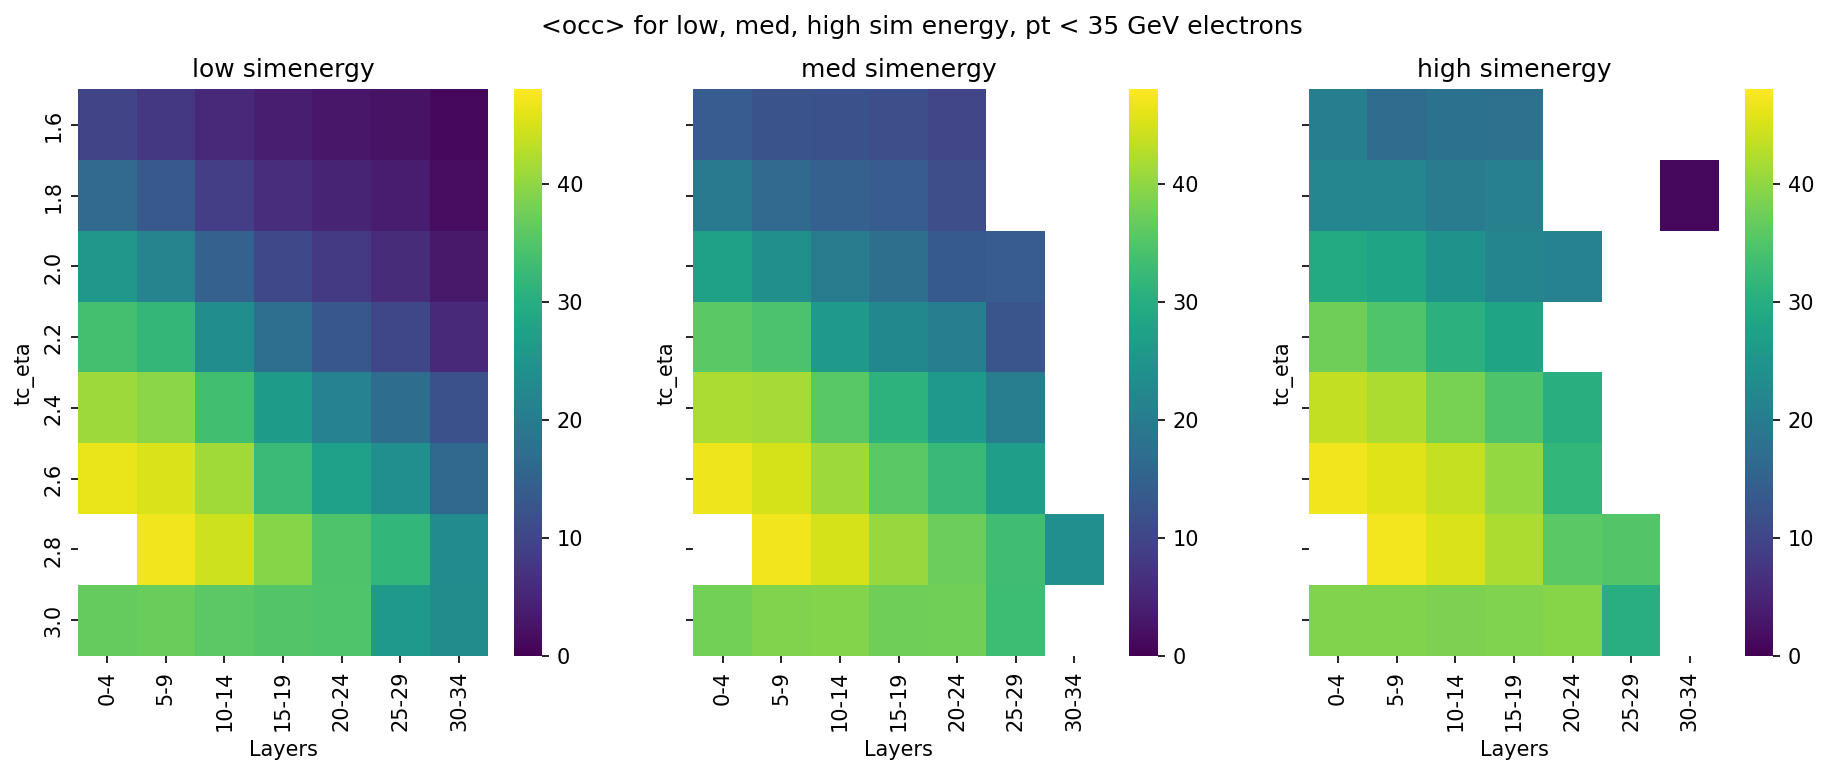

In [27]:
fig, axes = plt.subplots(1, 3,figsize = (15,5), sharex=True, sharey=True)
fig.suptitle('<occ> for low, med, high sim energy, pt < 35 GeV electrons')

sns.heatmap(low_mean,
            ax = axes[0],
           xticklabels =['0-4','5-9','10-14','15-19','20-24','25-29','30-34'],
           yticklabels = np.linspace(1.6,3.0,8),
           cmap = 'viridis',
           vmin = 0,
           vmax = 48)
axes[0].set_title('low simenergy')

axes[0].set_xlabel('Layers')
axes[0].set_ylabel('tc_eta')

sns.heatmap(med_mean,
            ax = axes[1],
           xticklabels =['0-4','5-9','10-14','15-19','20-24','25-29','30-34'],
           yticklabels = np.linspace(1.6,3.0,8),
           cmap = 'viridis',
           vmin = 0,
           vmax = 48)
axes[1].set_title('med simenergy')
axes[1].set_xlabel('Layers')
axes[1].set_ylabel('tc_eta')

sns.heatmap(high_mean,
            ax = axes[2],
           xticklabels =['0-4','5-9','10-14','15-19','20-24','25-29','30-34'],
           yticklabels = np.linspace(1.6,3.0,8),
           cmap = 'viridis',
           vmin = 0,
           vmax = 48)
axes[2].set_title('high simenergy')

axes[2].set_xlabel('Layers')
axes[2].set_ylabel('tc_eta');

In [20]:
layers = np.sort(w_sim['layer'].unique().astype('int'))

In [21]:
sum_sims = []
for layer in layers:
    sum = ((w_sim['simenergy'][w_sim.layer==layer]).sum())
    sum_sims.append(sum) 

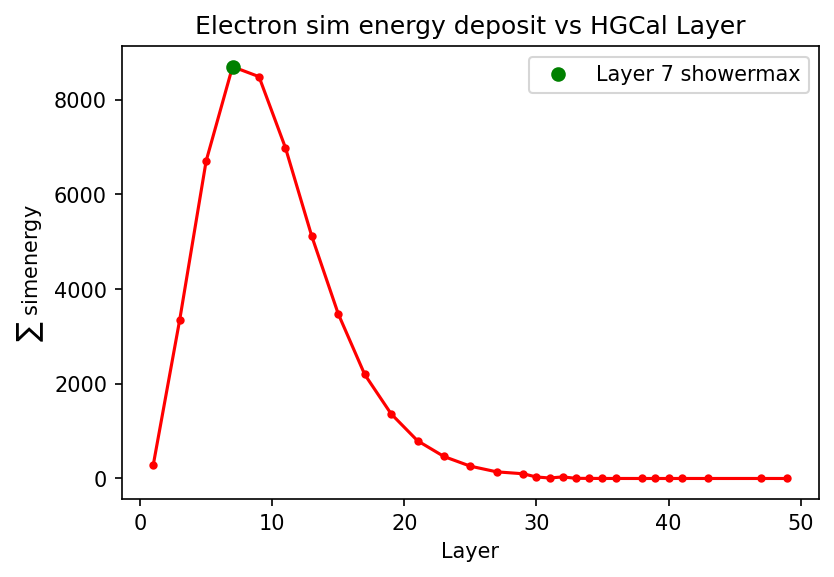

In [28]:
plt.plot(layers, sum_sims,'r.-')
plt.plot(layers[np.argmax(sum_sims)],np.max(sum_sims),'go',label ='Layer {} showermax'.format(layers[np.argmax(sum_sims)]))
plt.xlabel('Layer')
plt.ylabel(r'$\sum$ simenergy')
plt.title('Electron sim energy deposit vs HGCal Layer')
plt.legend();

arbitrary eta cut on module position

In [29]:
eta_cut = 2.0

In [30]:
sh_max_low_eta = w_sim[w_sim.tc_eta < eta_cut][w_sim.layer == 7]
sh_max_high_eta = w_sim[w_sim.tc_eta >= eta_cut][w_sim.layer == 7]

/tmp/ipykernel_79/2659205144.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sh_max_low_eta = w_sim[w_sim.tc_eta < eta_cut][w_sim.layer == 7]
/tmp/ipykernel_79/2659205144.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sh_max_high_eta = w_sim[w_sim.tc_eta >= eta_cut][w_sim.layer == 7]


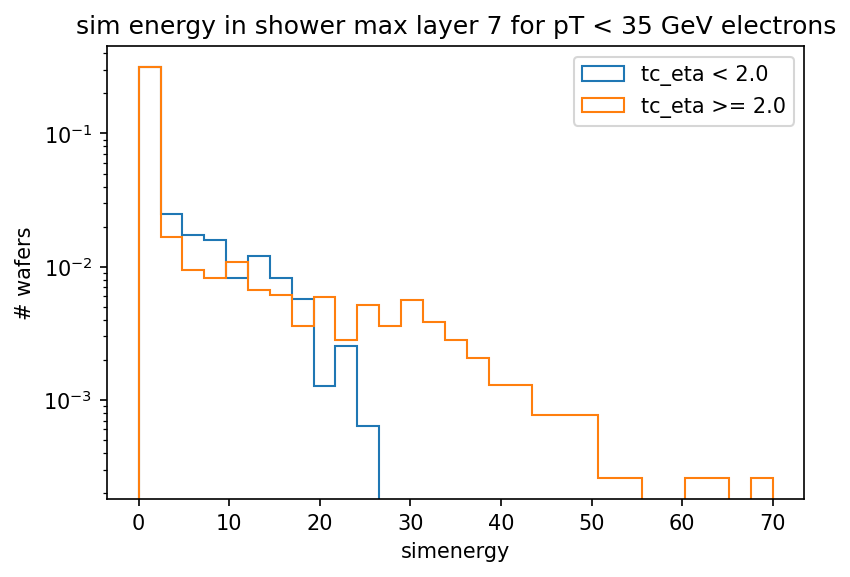

In [31]:
plt.hist(sh_max_low_eta['simenergy'],label = 'tc_eta < {}'.format(eta_cut),histtype='step',bins=np.linspace(0,70,30),density = True)
plt.hist(sh_max_high_eta['simenergy'],label = 'tc_eta >= {}'.format(eta_cut),histtype='step',bins=np.linspace(0,70,30),density = True)
plt.xlabel('simenergy')
plt.ylabel('# wafers')
plt.yscale('log')
plt.legend()
plt.title('sim energy in shower max layer 7 for pT < 35 GeV electrons');

low eta first

/tmp/ipykernel_79/3929780931.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  med = sh_max_low_eta[sh_max_low_eta.simenergy >= low_max][sh_max_low_eta.simenergy < med_max]


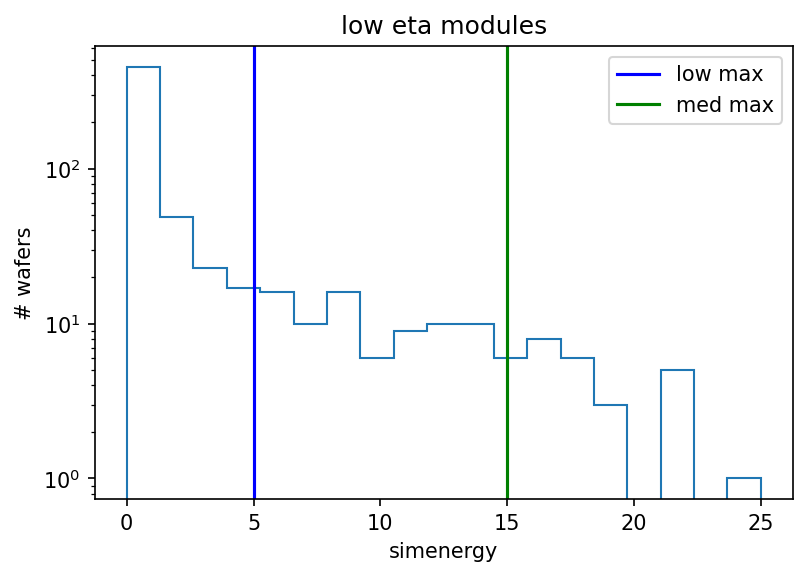

In [32]:
low_max, med_max = 5,15

low = sh_max_low_eta[sh_max_low_eta.simenergy < low_max]
med = sh_max_low_eta[sh_max_low_eta.simenergy >= low_max][sh_max_low_eta.simenergy < med_max]
high = sh_max_low_eta[sh_max_low_eta.simenergy >= med_max]

plt.close()
plt.hist(sh_max_low_eta['simenergy'],bins = np.linspace(0,25,20),color = 'tab:blue',histtype='step')
plt.yscale('log')
plt.ylabel('# wafers')
plt.xlabel('simenergy')
plt.axvline(x = low_max,color = 'blue',label = 'low max')
plt.axvline(x = med_max,color = 'green',label = 'med max')
plt.legend()
plt.title('low eta modules');

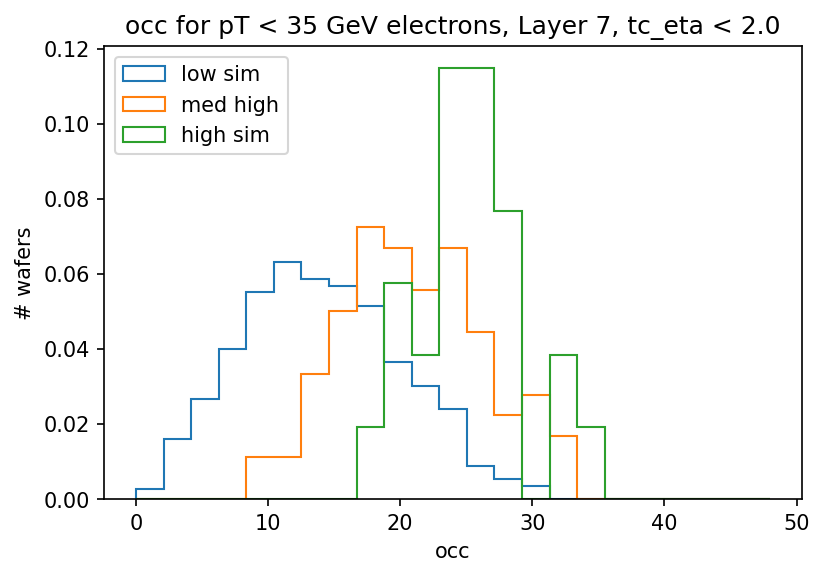

In [33]:
CALQ_COLS = ['CALQ_%i'%c for c in range(0, 48)]
low_calQ = low[CALQ_COLS]
med_calQ = med[CALQ_COLS]
high_calQ = high[CALQ_COLS]

low_occ = np.count_nonzero(low_calQ,axis=1)
med_occ = np.count_nonzero(med_calQ,axis=1)
high_occ = np.count_nonzero(high_calQ,axis=1)


plt.hist(low_occ, bins = np.linspace(0,48,24),label = 'low sim',histtype='step', density = True)
plt.hist(med_occ, bins = np.linspace(0,48,24),label = 'med high',histtype='step',density = True)
plt.hist(high_occ, bins = np.linspace(0,48,24),label = 'high sim',histtype='step',density = True)
plt.xlabel('occ')
plt.ylabel('# wafers')
plt.legend(loc='upper left')
plt.title('occ for pT < 35 GeV electrons, Layer 7, tc_eta < {}'.format(eta_cut));

high eta now

/tmp/ipykernel_79/1935097543.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  med = sh_max_high_eta[sh_max_high_eta.simenergy >= low_max][sh_max_high_eta.simenergy < med_max]


Text(0.5, 1.0, 'high eta modules')

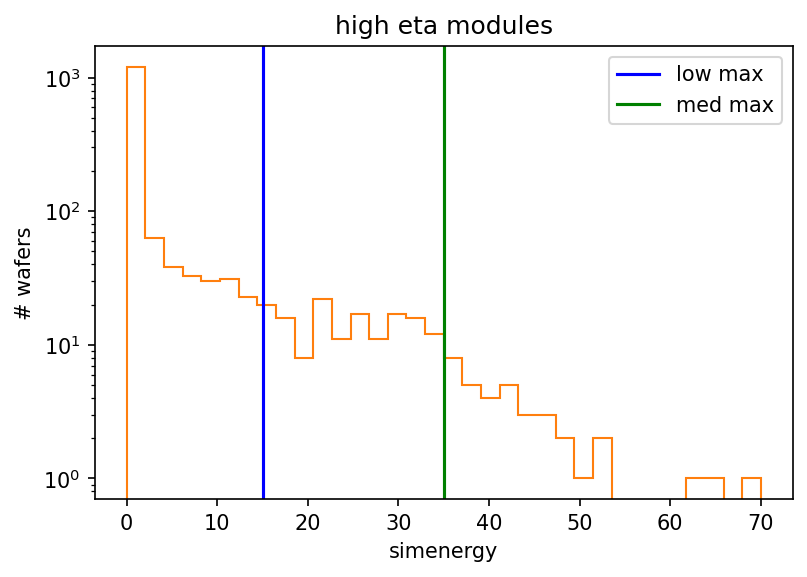

In [34]:
low_max, med_max = 15,35

low = sh_max_high_eta[sh_max_high_eta.simenergy < low_max]
med = sh_max_high_eta[sh_max_high_eta.simenergy >= low_max][sh_max_high_eta.simenergy < med_max]
high = sh_max_high_eta[sh_max_high_eta.simenergy >= med_max]

plt.close()
plt.hist(sh_max_high_eta['simenergy'],bins = np.linspace(0,70,35),color = 'tab:orange',histtype='step')
plt.yscale('log')
plt.ylabel('# wafers')
plt.xlabel('simenergy')
plt.axvline(x = low_max,color = 'blue',label = 'low max')
plt.axvline(x = med_max,color = 'green',label = 'med max')
plt.legend()
plt.title('high eta modules')

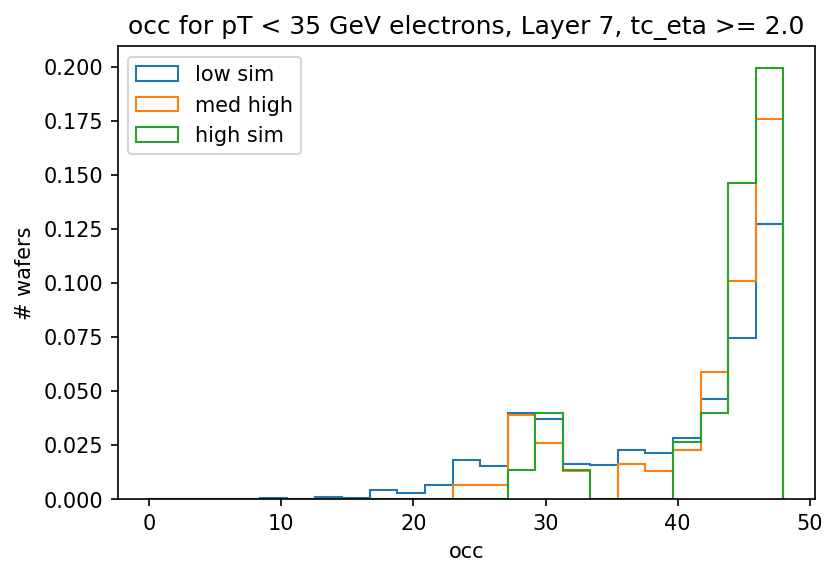

In [35]:
CALQ_COLS = ['CALQ_%i'%c for c in range(0, 48)]
low_calQ = low[CALQ_COLS]
med_calQ = med[CALQ_COLS]
high_calQ = high[CALQ_COLS]

low_occ = np.count_nonzero(low_calQ,axis=1)
med_occ = np.count_nonzero(med_calQ,axis=1)
high_occ = np.count_nonzero(high_calQ,axis=1)

plt.hist(low_occ, bins = np.linspace(0,48,24),label = 'low sim',histtype='step', density = True)
plt.hist(med_occ, bins = np.linspace(0,48,24),label = 'med high',histtype='step', density = True)
plt.hist(high_occ, bins = np.linspace(0,48,24),label = 'high sim',histtype='step', density = True)
plt.xlabel('occ')
plt.ylabel('# wafers')
plt.legend(loc='upper left')
plt.title('occ for pT < 35 GeV electrons, Layer 7, tc_eta >= {}'.format(eta_cut));

In [36]:
input_calQ = w_sim[CALQ_COLS]
occupancy_0MT = np.count_nonzero(input_calQ,axis=1)

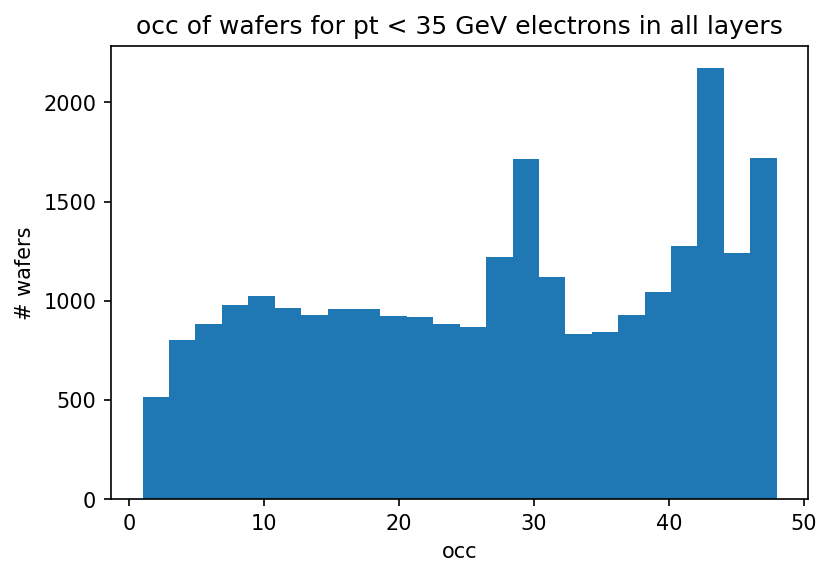

In [39]:
plt.hist(occupancy_0MT,24)
plt.xlabel('occ')
plt.ylabel('# wafers')
plt.title('occ of wafers for pt < 35 GeV electrons in all layers');

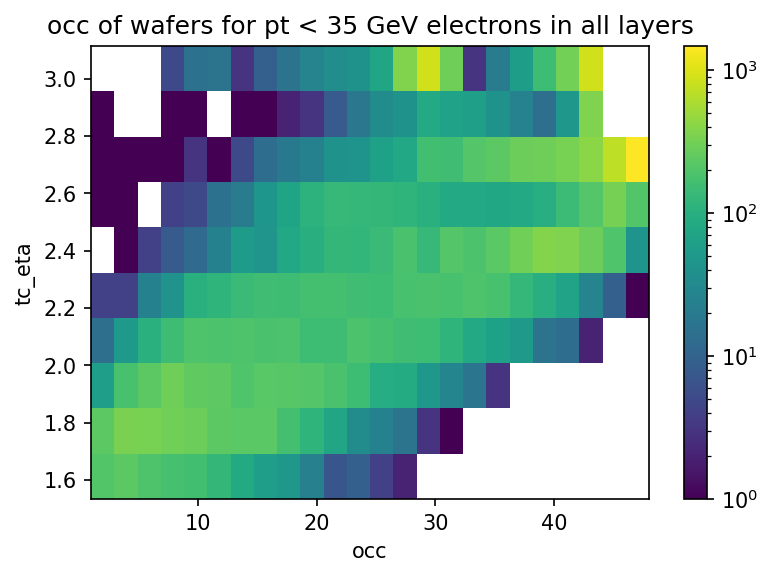

In [50]:
fig, ax = plt.subplots()
h = ax.hist2d(occupancy_0MT,w_sim['tc_eta'],bins=(24,10), norm=LogNorm());
fig.colorbar(h[3],ax=ax)
plt.xlabel('occ')
plt.ylabel('tc_eta')
plt.title('occ of wafers for pt < 35 GeV electrons in all layers');

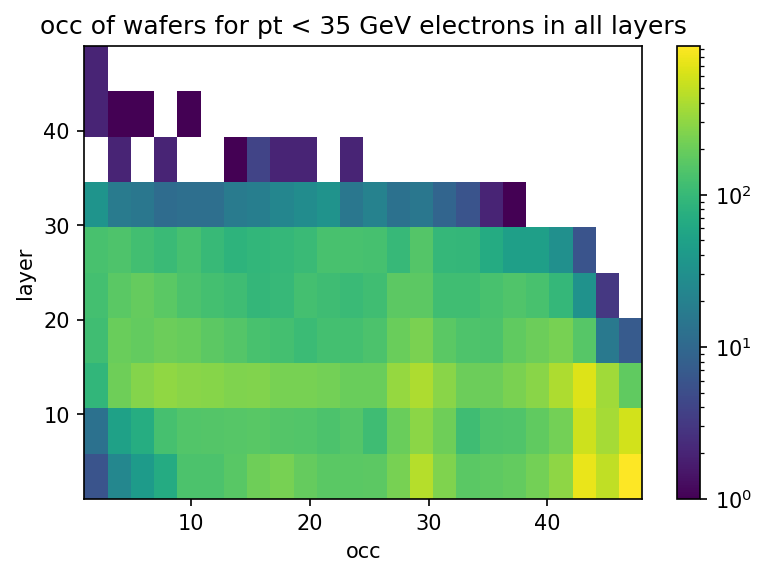

In [51]:
fig, ax = plt.subplots()
h = ax.hist2d(occupancy_0MT,w_sim['layer'],bins=(24,10), norm=LogNorm());
fig.colorbar(h[3],ax=ax)
plt.xlabel('occ')
plt.ylabel('layer')
plt.title('occ of wafers for pt < 35 GeV electrons in all layers');